In [210]:
# IMPORTANTE:
# Editar el archivo "funciones_TP2" agregando el path de "Matriz latina"

import funciones_TP2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

### **Consigna 1**
**Probar que:
\begin{align*} (I − A)^{−1} = I + A + A^{2} + A^{3} + . . . + A^{n} + . . . ⇒ \lim_{n \to ∞} A^{n+1} = 0 \end{align*}**

Para la serie $(I - A)^{−1} = I + A + A^{2} + A^{3} + . . . + A^{n}$ queremos demostrar que el término $A^{n + 1}$ tiende a $0$ cuando $n → ∞$

Para esto partimos de la expresión:
\begin{align*} (I - A)^{−1} = \lim_{n \to ∞} I + A + A^{2} + A^{3} + . . . + A^{n} \end{align*}

Multiplicamos por $(I - A)$ en ambos lados:
\begin{align*} (I - A)(I - A)^{−1} = I = \lim_{n \to ∞} (I - A) (I + A + A^{2} + A^{3} + . . . + A^{n})\end{align*}

Distribuimos:

\begin{align*} I = \lim_{n \to ∞} I (I + A + A^{2} + A^{3} + . . . + A^{n} ) -A (I + A + A^{2} + A^{3} + . . . + A^{n})\end{align*}

\begin{align*} I = \lim_{n \to ∞}(I + A + A^{2} + A^{3} + . . . + A^{n} ) - (A + A^{2} + A^{3} + A^{4} . . . + A^{n+1})\end{align*}

Esto resulta en una serie telescópica:

\begin{align*} I = \lim_{n \to ∞} I - A + A - A^{2} + A^{2} - A^{3} + A^{3} - A^{4} \hspace{2mm} . . . \hspace{2mm} - A^{n} + A^{n} - A^{n+1} \end{align*}

$
$

\begin{align*} I = \lim_{n \to ∞} I - A^{n+1} ⇔ \lim_{n \to ∞} A^{n+1} → \hspace{1mm} 0 \end{align*}

### **Consigna 2**
**Comenzamos graficando, para las dos matrices $A_{1}$ y $A_{2}$, dos vectores definidos de la forma: $a_{1}(n)$ = $||A_1^{n}||_{2}$ y $a_{2}(n)$ = $||A_2^{n}||_{2}$. O sea, que cada uno de sus elementos representa
la norma 2 de la matriz elevada a la potencia que corresponde a su índice (para esta parte se puede utilizar scipy.linalg.norm). Los vectores los definimos de largo $N$ = 250.**



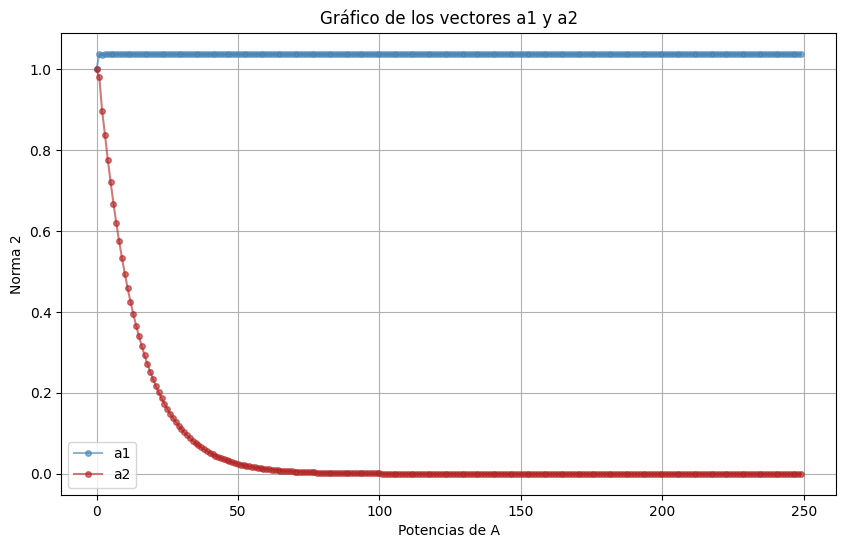

In [211]:
# Definimos la matriz A_1.
A_1 = np.array([
        [0.186, 0.521, 0.014, 0.320, 0.134],
        [0.240, 0.073, 0.219, 0.013, 0.327],
        [0.098, 0.120, 0.311, 0.302, 0.208],
        [0.173, 0.030, 0.133, 0.140, 0.074],
        [0.303, 0.256, 0.323, 0.225, 0.257]])

# Definimos la matriz A_2.
A_2 = np.array([
    [0.186, 0.521, 0.014, 0.320, 0.134],
    [0.240, 0.073, 0.219, 0.013, 0.327],
    [0.098, 0.120, 0.311, 0.302, 0.208],
    [0.173, 0.030, 0.133, 0.140, 0.074],
    [0.003, 0.256, 0.323, 0.225, 0.257]])

# Generamos los vectores a_1 y a_2 usando la función definirVector
a_1 = funciones_TP2.definirVector(A_1, 250)
a_2 = funciones_TP2.definirVector(A_2, 250)

# Creamos un arreglo de índices de 0 a 249 para usar en el gráfico.
indices = np.arange(250)

plt.figure(figsize=(10, 6))

plt.plot(indices, a_1, label='a1', color='steelblue', marker='o', markersize=4, alpha=0.6)
plt.plot(indices, a_2, label='a2', color='firebrick', marker='o', markersize=4, alpha=0.6)
plt.title('Gráfico de los vectores a1 y a2')
# Etiquetamos el eje x y el eje y.
plt.xlabel('Potencias de A')
plt.ylabel('Norma 2')

plt.legend()
# Agregamos una grilla para mejorar la visualización.
plt.grid(True)

# Mostramos el gráfico en pantalla.
plt.show()

Conforme aumenta el exponente al que se elevan las matrices $A$ podemos notar que la norma parece converger a un valor determinado.

Para la matríz $A_1$, la serie parece converger a $norma = 1$, mientras que la matríz $A_2$, converge a $norma = 0$.

### **Consigna 3**
**Mediante el metodo de la potencia, encontrar el mayor autovalor de las matrices $A_1$ y $A_2$. Implementar ese calculo en la funcion metodoPotencia del archivo funciones.py.
Dado que el metodo de la potencia es inicializado con un vector aleatorio $x_{0}$, vamos a hacer el calculo del autovalor estadısticamente con el metodo de Monte Carlo. Este procedimiento repite la operacion un numero importante de veces (digamos 250). Se pide en la consigna transcribir en una tabla el promedio de los autovalores de las 250 iteraciones de Monte Carlo para cada matriz, poniendo ademas el desvıo estandar encontrado.**

La funcion metodoPotencia implementada en el archivo funciones_TP2.py toma como parámetro una toleracia $e$ para poder salir del loop (acotando inferiormente la norma de la resta de un paso a otro). Utilizamos la misma para poder probar y "jugar" con el error. Sin embargo notamos que con una tolerancia alta, igualmente aproxima muy bien el autovalor esperado.

La siguiente tabla expresa los valores de promedio y desviación estandar  con una toleracia $e= 0.1$.

In [212]:
# Llamamos a la función monteCarlo para obtener autovalores de A_1 y A_2 con un error e = 0.1.
autovalores_A_1 = funciones_TP2.monteCarlo(A_1, 0.1)
autovalores_A_2 = funciones_TP2.monteCarlo(A_2, 0.1)

# Calculamos el promedio de los autovalores obtenidos para A_1 y A_2.
promedio_A_1 = np.mean(autovalores_A_1)
promedio_A_2 = np.mean(autovalores_A_2)

# Calculamos el desvío estándar de los autovalores para A_1 y A_2.
desvio_A_1 = np.std(autovalores_A_1)
desvio_A_2 = np.std(autovalores_A_2)

# Creamos una tabla con los valores calculados.
data = {
    'A1': [promedio_A_1, desvio_A_1],
    'A2': [promedio_A_2, desvio_A_2]
}

index = ['promedio', 'desviacion']
tabla = pd.DataFrame(data, index=index)

print(tabla)

                  A1        A2
promedio    0.999725  0.927240
desviacion  0.000939  0.003732


### **Consigna 4.**

**(a) De forma similar a la consigna 2, graficar la serie de potencias $(I - A)^{−1}$ de $A_{1}$ y $A_{2}$
(siguiendo la ecuación 4) para para $n$ = 10 y $n$ = 100.**

**(b) ¿Hay convergencia para ambas matrices? Argumentar la respuesta.**

**(c) ¿Podría establecer una regla por la cual se pueda asegurar convergencia de la serie infinita?**

**(d) En caso de existir convergencia, grafique el error obtenido como un vector $e(n)$ = $∥(I + A + A^{2} + A^{3} + . . . +A^{n})-(I-A)^{-1}∥_{2}$.**

**Nota: calcular $(I −A){−1}$ con la función $inversaLU$ desarrollada por el grupo en el TP1.**


**(a)** Graficos para $A1$ y $A2$ de las series de potencias hasta $n=10$ y $n=100$

In [213]:
# Calculamos la serie de potencias para A_1 y A_2 con diferentes valores de n.
serie_10_A_1 = funciones_TP2.seriePotenciaConNorma(A_1, 10)
serie_10_A_2 = funciones_TP2.seriePotenciaConNorma(A_2, 10)
serie_100_A_1 = funciones_TP2.seriePotenciaConNorma(A_1, 100)
serie_100_A_2 = funciones_TP2.seriePotenciaConNorma(A_2, 100)

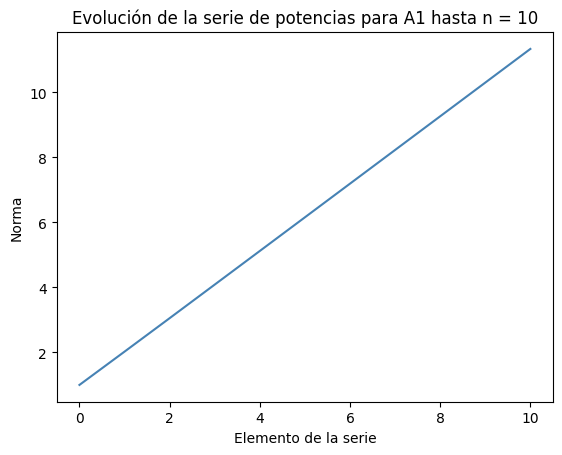

In [214]:
# Serie de potencias hasta n = 10 para A_1
elementos = list(range(0, 11))
plt.plot(elementos, serie_10_A_1, linestyle='-', color='steelblue')
plt.xlabel('Elemento de la serie')
plt.ylabel('Norma')
plt.title('Evolución de la serie de potencias para A1 hasta n = 10')
plt.show()

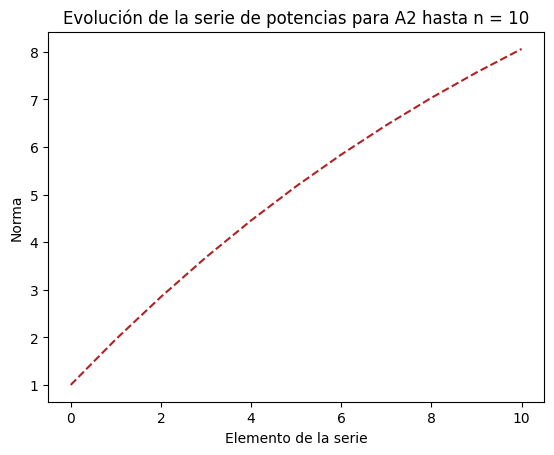

In [215]:
# Serie de potencias hasta n = 10 para A_2
plt.plot(elementos, serie_10_A_2, linestyle='--', color='firebrick')
plt.xlabel('Elemento de la serie')
plt.ylabel('Norma')
plt.title('Evolución de la serie de potencias para A2 hasta n = 10')
plt.show()

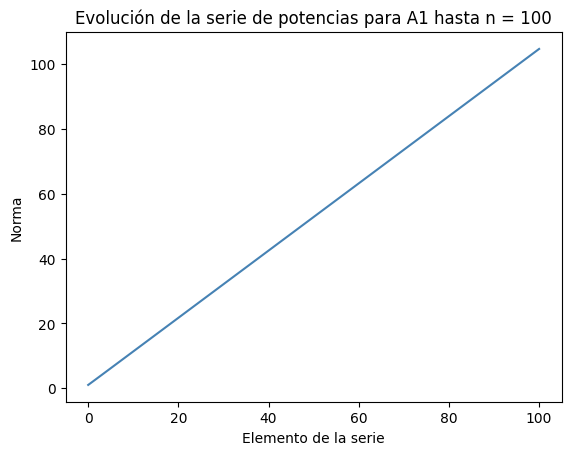

In [216]:
# Serie de potencias hasta n = 100 para A_1
elementos = list(range(0, 101))
plt.plot(elementos, serie_100_A_1, linestyle='-', color='steelblue')
plt.xlabel('Elemento de la serie')
plt.ylabel('Norma')
plt.title('Evolución de la serie de potencias para A1 hasta n = 100')
plt.show()

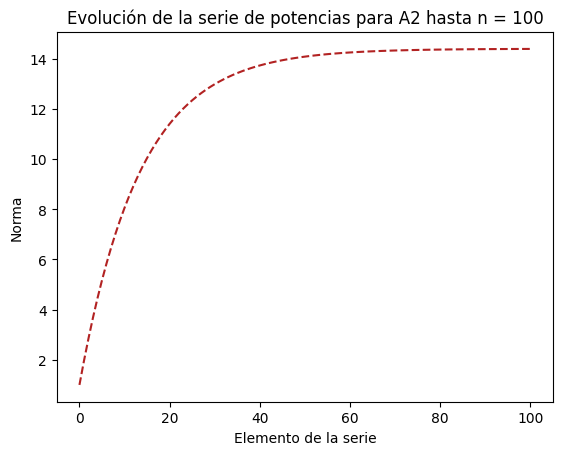

In [217]:
# Serie de potencias hasta n = 100 para A_2
plt.plot(elementos, serie_100_A_2, linestyle='--', color='firebrick')
plt.xlabel('Elemento de la serie')
plt.ylabel('Norma')
plt.title('Evolución de la serie de potencias para A2 hasta n = 100')
plt.show()

**(b)** En esta instancia no tenemos un criterio establecido para determinar si una serie converge, por lo tanto, podemos tener una idea aproximada con los valores representados en "Evolución de la serie de potencias hasta $n=100$". $A_2$ converge a un valor cercano a 14 y $A_1$ aparentemente no converge.

**(c)** Teniendo en cuenta el radio espectral (mayores autovalores) de $A_1$ y $A_2$ determinamos el siguiente criterio de convergencia:

"Si el radio espectral de una matriz $A$ es < 1, converge la serie de potencias asociada a $A$. Si esto no se cumple, no podemos asegurar si converge o no"

**(d)** Según el criterio de radio espectral, la serie de potencias asociada a $A_2$ converge, por lo que procedemos a graficar error de convergencia:








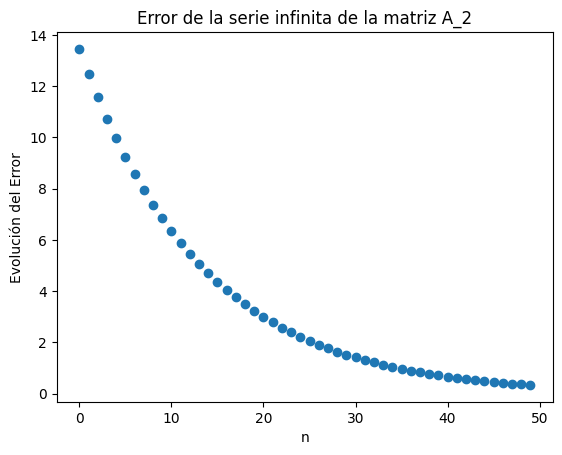

In [218]:
# Calculamos el error de la serie de potencias para A_2 hasta 50 términos (lo elegimos arbitrariamente ya que no se especificaba hasta que "n")
error_A_2 = funciones_TP2.errorSeriePotencias(A_2, 50)

# Generamos los datos para graficar la evolución del error.
x = list(range(len(error_A_2)))
y = list(error_A_2)

plt.scatter(x, y)
plt.xlabel('n')
plt.ylabel('Evolución del Error')
plt.title('Error de la serie infinita de la matriz A_2')
plt.show()

Podemos observar que cuando $n$ tiende a infinito, el error tiende a 0.

###**Consigna 5**
**Retomar de las matrices insumo-producto de los paises $P_{1}$ y $P_{2}$ asignados en el TP1, y mediante el método de la potencia, encontrar el autovalor mayor de cada uno de las $A^{ss}$ y $A^{rr}$. Decidir si existe convergencia de la suma de potencias, a partir del argumento dado en la Consigna 4 (c).**


In [219]:
#Resultado esperado

A_uu, A_vv = funciones_TP2.A_uu, funciones_TP2.A_vv

autovalores, autovectores = np.linalg.eig(A_uu)
max_autovalor_A_uu = np.max(autovalores)

print(f"El mayor autovalor para A_uu es: {max_autovalor_A_uu}")

autovalores, autovectores = np.linalg.eig(A_vv)
max_autovalor_A_vv = np.max(autovalores)

print(f"El mayor autovalor para A_vv es: {max_autovalor_A_vv}")

El mayor autovalor para A_uu es: (0.31883726565412435+0j)
El mayor autovalor para A_vv es: (0.33803293326712847+0j)


In [220]:
#Calculo de Autovalores utilizando Metodo de la Potencia con tolerancia e = 1
autovalor1_uruguay = funciones_TP2.metodoPotencia(A_uu, 1)[0]

autovalor1_venezuela = funciones_TP2.metodoPotencia(A_vv, 1)[0]

print(f"El mayor autovalor de A^uu es: {autovalor1_uruguay}\n")
print(f"El mayor autovalor de A^vv es: {autovalor1_venezuela}")


El mayor autovalor de A^uu es: [[0.32201338]]

El mayor autovalor de A^vv es: [[0.37374694]]


In [221]:
#Calculo de Autovalores utilizando Metodo de la Potencia con tolerancia e = 0.1
autovalor1_uruguay = funciones_TP2.metodoPotencia(A_uu, 0.1)[0]

autovalor1_venezuela = funciones_TP2.metodoPotencia(A_vv, 0.1)[0]

print(f"El mayor autovalor de A^uu es: {autovalor1_uruguay}\n")
print(f"El mayor autovalor de A^vv es: {autovalor1_venezuela}")

El mayor autovalor de A^uu es: [[0.31850033]]

El mayor autovalor de A^vv es: [[0.33798453]]


In [222]:
#Calculo de Autovalores utilizando Metodo de la Potencia con tolerancia e = 0.01
autovalor1_uruguay = funciones_TP2.metodoPotencia(A_uu, 0.01)[0]

autovalor1_venezuela = funciones_TP2.metodoPotencia(A_vv, 0.01)[0]

print(f"El mayor autovalor de A^uu es: {autovalor1_uruguay}\n")
print(f"El mayor autovalor de A^vv es: {autovalor1_venezuela}")

El mayor autovalor de A^uu es: [[0.31854641]]

El mayor autovalor de A^vv es: [[0.33860239]]


Dado el criterio presentado en **4(c)**, podemos concluir que ambas matrices intrarregionales convergen ya que su radio espectral es menor a 1.

### **Consigna 6.**
**Sea $n ≥ 2$ y $E_{n} ∈ R^{n \times n}$ una matriz definida como $E_{n} = I_{n} - \frac{1}{n} \hspace{1mm} e \hspace{1mm} e^{t}$ donde $e ∈ R^{n}$ es un vector columna de todos 1s y $I_{n}$ es la matriz identidad de $n \times n$.**

**(a) Probar que para cualquier vector $z ∈ R^{n}$, el promedio de las componente del vector $E_{n} \cdot z$ es 0. Analizar $E_{n} \cdot A$ y describir qué efecto tiene $E_{n}$ sobre una matriz $A$ de $n \times n$.**

**(b) Calcular analíticamente todos los autovalores y autovectores de $E_{n}$. Determinar la imagen y el núcleo de $E_{n}$, y la dimensión de los mismos.**

**Sugerencia: considerar la base de vectores $\{e, d2, . . . , dn \}$ de $R^{n}$ siendo $ \{ d2, . . . , dn \} $
una base de $⟨e⟩^{⊥}$.**

**(c) Probar que $E_{n}$ es una matriz de proyección ortogonal. ¿Sobre qué subespacio proyecta?**

**(d) Responder Verdadero o Falso, demostrando o dando un contraejemplo:**

**(i) En es una matriz ortogonal.**

**(ii) En es singular.**

**(iii) En es definida positiva.**

**(iv) $traza(E_{n}) = n − 1$**

a)
Desarrollando la fórmula dada y un vector $Z$ genérico:

$E_{n}=\begin{pmatrix}
1 - \frac{1}{n} & - \frac{1}{n}   & . . & - \frac{1}{n} \\
- \frac{1}{n}   & 1 - \frac{1}{n} & . . & - \frac{1}{n} \\
        :       &        :        & .   &      :         \\
- \frac{1}{n}   & - \frac{1}{n}   & . . & 1 - \frac{1}{n}
\end{pmatrix}
$ , $~~~ Z = \begin{pmatrix}
z_{1} \\
z_{2} \\
   :  \\
z_{n} \\
\end{pmatrix}
$

$
$

Luego buscamos al vector $V$ como la multiplicación $E_{n} \cdot Z$:




$V=\begin{pmatrix}
1 - \frac{1}{n} & - \frac{1}{n}   & . . & - \frac{1}{n} \\
- \frac{1}{n}   & 1 - \frac{1}{n} & . . & - \frac{1}{n} \\
        :       &        :        & .   &      :         \\
- \frac{1}{n}   & - \frac{1}{n}   & . . & 1 - \frac{1}{n}
\end{pmatrix} \cdot \begin{pmatrix}
z_{1} \\
z_{2} \\
   :  \\
z_{n} \\
\end{pmatrix}
$

$
$

$V= \begin{pmatrix}
(1 - \frac{1}{n}) \cdot z_{1} ~ - ~ \frac{1}{n} \cdot z_{2} ~ - ~ . . . ~ - ~ \frac{1}{n} \cdot z_{n} \\
- ~ \frac{1}{n} \cdot z_{1} ~ + ~ (1 - \frac{1}{n}) \cdot z_{2} ~ - ~ . . . ~ - ~ \frac{1}{n} \cdot z_{n} \\
          :         \\
- ~ \frac{1}{n} \cdot z_{1} ~ - ~ \frac{1}{n} \cdot z_{2} ~ - ~ . . . ~ + ~ (1 - \frac{1}{n}) \cdot z_{n} \end{pmatrix}
$

$
$

Para que el promedio de las componentes del vector $V$ sea $0$, la sumatoria debe serlo tambien:
$
$

$
promedio = \frac{ \sum_{i=1}^{n} v_{i} }{n}=0 ⇔ \sum_{i=1}^{n}v_{i} = 0
$

$
$

Desarrollando la sumatoria nos queda:

$ \sum_{i=1}^{n}v_{i} = (1 - \frac{1}{n}) \cdot z_{1} ~ - ~ \frac{1}{n} \cdot z_{2} ~ - ~ . . . ~ - ~ \frac{1}{n} \cdot z_{n} ~ + ~ . . . ~ - ~ \frac{1}{n} \cdot z_{1} ~ - ~ \frac{1}{n} \cdot z_{2} ~ - ~ . . . ~ + ~ (1 - \frac{1}{n}) \cdot z_{n}$

$
$

$ \sum_{i=1}^{n}v_{i} = z_{1} \cdot (1 ~ - ~ \frac{1}{n} ~ - ~ \frac{1}{n} ~ - ~ . . . ~ - ~ \frac{1}{n}) ~ + ~ . . . ~ + ~ z_{n} \cdot (- ~ \frac{1}{n} ~ - ~ \frac{1}{n} ~ - ~ . . . ~ + ~ 1 - ~ \frac{1}{n})$

$
$

Una columna tiene $n$ términos. Uno de esos términos es el de la diagonal, que tiene la forma $(1-\frac{1}{n})$. El resto de términos, es decir $n-1$ términos, tienen la forma $(-\frac{1}{n})$. Luego, simplificamos como:

$ \sum_{i=1}^{n}v_{i} = z_{1} \cdot ((1 ~ - ~ \frac{1}{n}) ~ - ~ (n-1) \cdot \frac{1}{n}) ~ + ~ . . . ~ + ~ z_{n} \cdot ((1 ~ - ~ \frac{1}{n}) ~ - ~ (n-1) \cdot \frac{1}{n})$

$ \sum_{i=1}^{n}v_{i} = z_{1} \cdot (1 ~ - ~ \frac{1}{n} ~ - 1 ~ + ~ \frac{1}{n}) ~ + ~ . . . ~ + ~ z_{n} \cdot (1 ~ - ~ \frac{1}{n} ~ - 1 ~ + ~ \frac{1}{n})$

$ \sum_{i=1}^{n}v_{i} = (1 ~ - ~ \frac{1}{n} ~ - 1 ~ + ~ \frac{1}{n}) \cdot (z_{1}~+~...~
+~z_{n})$

$ \sum_{i=1}^{n}v_{i} = 0$

Dada la definicion de multiplicaciñon matricial, podemos pensar a la misma como la multiplicacion de la matriz a izquierda por cada una de las columnas de la matriz a derecha. Como en el item anterior probamos que al multiplicar al vector $z$ por $E_n$ el promedio del vector resultante daba 0, podemos concluir que entonces el promedio de cada una de las columnas de la matriz resultante de $E_n ⋅ A$ tambien va a dar 0.



b) Como vimos en el punto anterior, la suma de las columnas de $E_{n}$ = 0. Entonces sabemos que el vector $(1, 1, ..., 1)$, presentado como $e$, pertenece $Nu(E_n)$.

Calculamos $E_n ⋅e$ :

$E_n.e=(I_n-\frac{-1}{n}\cdot e \cdot e^t)e ~~=~I_n \cdot e\frac{-1}{n} \cdot e \cdot e^t \cdot e$

Notamos que $ee^t$ es igual a $n$ ya que es la sumatoria de $n$ terminos de valor 1.

Continúa como $e~ -\frac{1}{n}\cdot e \cdot n=e-e=0$
y podemos concluir que:

*   $e\in Nu(E_n)$
*   $e$ es un autovector asociado al autovalor $λ_1=0$, es decir:

 $E_n \cdot e=0 ⟺ E_n\cdot e=0\cdot e$

Tomando esto en cuenta, y teniendo en consideración la sugerencia dada en consigna vamos a calcular $E_n \cdot d_i$

$E_n \cdot d_i = (I_n ~ -\frac{1}{n} \cdot e \cdot e^t)\cdot d_i = (I_n \cdot d_i -\frac{1}{n} \cdot e \cdot e^t \cdot d_i)$

Aqui vemos que $e^t \cdot d_i$ es esencialmente el producto punto entre $e$ y el iésimo vector de la base de $⟨e\rangle^{⊥}$ , es decir, $d_i$ es ortogonal a $e ⟺ e^t \cdot d_i = 0$ lo que con simplifica la ecuación de la siguiente forma

$E_n \cdot d_i = I_m \cdot d_i = d_i$ finalmente llegamos a que $d_i$ es un autovector de $E_n$ asociado al autovalor $λ_i =1$

$E_n \cdot d_i = λ_i \cdot d_i~~~ ∀~~i, ~~2 ≤ i ≤ n$

Llegamos a que:

*   Hay ($n-1$) vectores L.I $\langle d_2, d_3, ..., d_n ⟩ \in Im(E_n)$
*   $e~ \in~ Nu(E_n)$

Por el Teorema de la Dimensión sabemos que la $Dim(Nu(E_n))+Dim(Im(E_n)) = n$. Por lo tanto:

$Dim(Nu(E_n)) = 1 ,~ Dim(Im(E_n)) = n - 1$

$Nu(E_n)=\langle e \rangle~$ y $~Im(E_n)=\langle d_2, d_3, ..., d_n ⟩$







**(c)** Queremos ver que $E_n$ es una proyeccion ortogonal, para esto debemos ver que cumple que:

*  Para que el proyector sea ortogonal $Im(E_n)$ debe ser otogonal al $Nu(E_n)$
*  $(E_n)^2 = E_n$

Sabemos por **6(b)** que $Nu(E_n)$ es efectivamente ortogonal a $Im(E_n)$.

Necesitamos entonces ver que vale que $(E_n)^2 = E_n$.

Partimos de

\begin{align} E_{n}=\begin{pmatrix}
1 - \frac{1}{n} & - \frac{1}{n}   & . . & - \frac{1}{n} \\
- \frac{1}{n}   & 1 - \frac{1}{n} & . . & - \frac{1}{n} \\
        :       &        :        & .   &      :         \\
- \frac{1}{n}   & - \frac{1}{n}   & . . & 1 - \frac{1}{n}
\end{pmatrix}
\end{align}


Vemos que en la multiplicacion matricial de $E_n \cdot E_n$ todo coeficiente de la matriz resultante es calculado como:

\begin{cases}
\text{$a_{ii}$}= & \text{$(1-\frac{1}{n})^2+(n-1)\cdot (-\frac{1}{n})^2$} \\
\text{$a_{ij} $}= & \text{$2\cdot (1-\frac{1}{n})\cdot (-\frac{1}{n}) + (n-2)\cdot (-\frac{1}{n})^2 $} ~~con~~ j\neq i
\end{cases}

El primer caso es asi ya que es el coeficiente de la diagonal de $E_n$ se multiplica a si mismo una vez y se multiplica $(n-1)$ veces por si mismo $\frac{-1}{n}$.

En el segundo caso se multiplica 2 veces un coeficiente de la diagonal de $E_n$ con otro coeficiente, y el resto es el cuadrado de $\frac{-1}{n}$ nuevamente.

Solo queda ver que estos terminos corresponden a los de la matriz original.

$(1-\frac{1}{n})^2+(n-1)\cdot (+\frac{1}{n^2})=(1-\frac{1}{n})$

$(1+\frac{1}{n^2}-\frac{2}{n}) +\frac{1}{n}-\frac{1}{n^2}=(1-\frac{1}{n}) $

$(1-\frac{1}{n})=(1-\frac{1}{n})$

Los coefcicientes de la diagonal dan igual, veamos con el resto.

$2\cdot (1-\frac{1}{n})\cdot (-\frac{1}{n}) + (n-2)\cdot (-\frac{1}{n})^2 =-\frac{1}{n}$

$-\frac{2}{n}+\frac{2}{n^2}+(\frac{1}{n}-\frac{2}{n^2})=-\frac{1}{n}$

$-\frac{1}{n}=-\frac{1}{n}$

También cumple, como vimos que todo elemento de $(E_n)^2$ es igual al elemento correspondiente de $E_n$, podemos afirmar que son iguales, al saber tambien que $E_n$ es simetrica, concluimos que $E_n$ es un proyector ortogonal.





Mostramos a continuaciòn sobre que subespacio proyecta:

Sea $D=\{ d_1, ..., d_n \}$ una base de autovectores de $E_n,~$ con $~d_1 = e$.

$\langle d_1 \rangle = Nu(E_n)$ y $\langle d_2, d_3, ..., d_n ⟩ = Im(E_n)$

Podemos expresar un vector genérico $v$ en la base $D$ como $v = \sum_{i=1}^{n} a_i \cdot d_i ~,~~ v \in \mathbb{R}^{n} ~,~~ a_i \in \mathbb{R}$.

$
$

Calculamos $E_n \cdot v$ como:

$E_n \cdot v = E_n \cdot (\sum_{i=1}^{n} a_i \cdot d_i) = E_n \cdot (a_1 \cdot d_1) + E_n \cdot (\sum_{i=2}^{n} a_i \cdot d_i) = a_1 \cdot (E_n \cdot d_1) + E_n \cdot (\sum_{i=2}^{n} a_i \cdot d_i)$

$
$

Sabemos que el autovector $d_1$ está asociado a $\lambda _1 = 0$. Los demás autovectores $d_i$ están asociados a $\lambda _i = 1 ~,~~ 2 \leq i \leq n$. Luego, vale que:

$
$

$a_1 \cdot (E_n \cdot d_1) + E_n \cdot (\sum_{i=2}^{n} a_i \cdot d_i) = 0 + \sum_{i=2}^{n} a_i \cdot E_n \cdot d_i = \sum_{i=2}^{n} a_i \cdot d_i \in \langle d_2, d_3, ..., d_n ⟩$

$
$

Finalmente concluimos que $E_n$ proyecta sobre $Im(E_n)$.

d)

$(\textrm{I})$  Falso, $E_{n}$ no es ortogonal, presentamos un contrajemplo:

Una matriz ortogonal debe cumpli que $QQ^{t}=I$.$~$La matriz $E_{n}$ con $n=2$, es decir $E_{2}$, no cumple esta propiedad y lo vemos a continuación.

\begin{align} I_{2} \neq \begin{pmatrix}
 \frac{1}{2} & \frac{-1}{2}  \\
\frac{-1}{2} & \frac{1}{2}  \\ \end{pmatrix} =
\begin{pmatrix}
 \frac{1}{2} & \frac{-1}{2}  \\
\frac{-1}{2} & \frac{1}{2}  \\ \end{pmatrix}\cdot \begin{pmatrix}
\frac{1}{2} & \frac{-1}{2}  \\
\frac{-1}{2} & \frac{1}{2}   
\end{pmatrix}
\end{align}

$(\textrm{II})$ Verdadero, $E_{n}$ es singular. Vimos en los previos subpuntos de este ejercicio $(6)$ que la sumatoria de cualquiera de las columas de $E_{n}$ es 0, es decir:

\begin{align}
∑_{i=1}^{n}a_{ij}=0 ~~~~ con~~ 0< j < n+1
\end{align}


Esto implica que una de las columnas es una combinación lineal de las demás, lo cual implica que las columnas son linealmente dependientes. Cuando esto ocurre, la matriz es singular.

$(\textrm{III})$ Falso, $E_{n}$ no es definida positiva. Para $E_{n}$ sea definida positiva se debe cumplir que $x^{t}E_{n}x~>0 ~~\forall x \neq
0$.

Mostramos que esto no ocurre, ya que con $x = (1,~1,~..,~1)$:

\begin{align}
E_{n}=\begin{pmatrix}
1 - \frac{1}{n} & - \frac{1}{n}   & . . & - \frac{1}{n} \\
- \frac{1}{n}   & 1 - \frac{1}{n} & . . & - \frac{1}{n} \\
        :       &        :        & .   &      :         \\
- \frac{1}{n}   & - \frac{1}{n}   & . . & 1 - \frac{1}{n}
\end{pmatrix} \cdot \begin{pmatrix}
1 \\
1 \\
   :  \\
1 \\
\end{pmatrix}
\end{align}

Nos da como resultado la sumatoria de cada una de las filas, pero como $E_{n}$ es cuadrada, y mostramos que la sumatoria de las columnas da 0, entonces la sumatoria de las filas también da 0. Por lo tanto podemos concluir que cada coeficiente del vector resultado será 0. Luego
\begin{align}
\begin{pmatrix}
1 & 1 &..& 1 \\
\end{pmatrix} \cdot \begin{pmatrix}
0 \\
0 \\
   :  \\
0 \\
\end{pmatrix}=0
\end{align}

Encontramos un $x\neq0$ tal que $x^{t}E_{n}x~=0$.



$(\textrm{IV})$ Verdadero, la traza de $E_{n}$ es la sumatoria de los elementos en la diagonal, que consta de $n$ veces el termino $(1 - \frac{1}{n})$.
Si desarrollamos esto vemos que $n⋅(1 - \frac{1}{n})=n-1$.

### Consigna 7.
**Análisis en Componentes Principales (ACP) por el método de la potencia:**

**Calcular la matriz de covarianzas $C$ del país $P_{1}$ a partir de las matriz $A^{rr}$ desde el Excel de CEPAL. Para ello se debe:**

* **Normalizar la matriz de coeficientes $A_{rr}$ de la forma:**

\begin{align*} \overline{A^{rr}} = E_{40} A^{rr} \end{align*}

* **Calcular la matriz de covarianzas como:**

\begin{align*} C=\overline{A^{rr}}^{t}~\overline{A^{rr}}~ /~ (40-1)\end{align*}

**Encontrar los 2 primeros autovectores usando el método de la potencia de la forma siguiente.
Algoritmo (Deflación de Hotelling):**

* **Inicialmente multiplicar un vector aleatorio $x_0$ de norma 1 a $C$ y luego continuar iterando utilizando la siguiente regla:**

\begin{align*} x_{1} = Cx_{0} \end{align*}
\begin{align*} x_{k+1} = Cx_{k} \end{align*}


**para encontrar el primer autovector (con máximo autovalor).**

* **En cada paso se debe volver a normalizar el siguiente $x_{k}$.**

* **Continuar mientras $∥x^{t}_{k+1}-x_{k}∥_{2}$ > $(1- \varepsilon )$, que es el criterio de parada para el algoritmo iterativo, con $\varepsilon > 0$.**

* **Devolver $x_{k+1}$ que es la aproximación al autovector buscado $v_{1}$.**

* **Obtenemos, a partir del coeficiente de Rayleigh $λ_{1} = \frac {v^{t}_{1}Cv_{1} } {v^{t}_{1}v_{1} }$.**

* **Se procede recursivamente y se calcula la nueva matriz $C^{'}$ sobre la cual se va a iterar nuevamente:**

\begin{align*} C^{'} = C - λ_{1}v_{1}v^{t}_{1} \end{align*}

**para encontrar el siguiente autovector $v_{2}$ y luego $λ_{2}$.**

In [223]:
# Calculamos la matriz de covarianza para A_uu y sus dos principales autovalores y autovectores.
A_uu = funciones_TP2.A_uu
covarianza_A_uu = funciones_TP2.matriz_covarianza(A_uu) # matriz_covarianza() centra la matriz (multiplica a izquierda por E_n)
autovalores_covarianza_A_uu, autovectores_covarianza_A_uu = funciones_TP2.hotelling(covarianza_A_uu)

# Mostramos los primeros dos autovalores, y sus autovectores correspondientes
print("Autovalor 1:",autovalores_covarianza_A_uu[0][0][0])
print("Autovalor 2:",autovalores_covarianza_A_uu[1][0][0], "\n")

print("Autovector 1:", autovectores_covarianza_A_uu[0].flatten(), "\n")
print("Autovector 2:", autovectores_covarianza_A_uu[1].flatten())

Autovalor 1: 0.011469539951065543
Autovalor 2: 0.009020402908915828 

Autovector 1: [0.11758909 0.12572489 0.         0.08963769 0.57441972 0.28044478
 0.06396099 0.31770244 0.18411855 0.0665571  0.21490853 0.14612732
 0.11258115 0.16254518 0.15941831 0.02196812 0.11624707 0.09608225
 0.07937832 0.09661498 0.10841247 0.07467211 0.08984588 0.08759043
 0.07664824 0.109429   0.09423143 0.10447219 0.12106622 0.05633294
 0.         0.03406747 0.07420954 0.13299521 0.06493688 0.27132179
 0.11601255 0.07678151 0.11680796 0.12539183] 

Autovector 2: [ 0.01500671 -0.14127538  0.         -0.10584599  0.64224818  0.20928351
  0.0144437   0.30373107  0.06889038  0.02490321  0.1186705  -0.16571375
 -0.04757955  0.0748982  -0.00513183 -0.02857567  0.00224805  0.00185809
 -0.08371791 -0.0552607  -0.1399534  -0.10386177 -0.12496704 -0.12182992
 -0.10661037 -0.15220528 -0.13106691 -0.14531083 -0.16839154 -0.06872717
  0.         -0.04156291 -0.09194011 -0.14698076 -0.10062221 -0.28742059
 -0.13870307 -

###**Consigna 8**
**Utilizando los dos autovectores del Análisis en Componentes Principales de
la consigna 5, proyectar las filas de $A{rr}$ en un scatter de 2 dimensiones. En este scatter identificar visualmente al menos dos clusters de 3 o más sectores que se encuentren a una distancia euclideana baja. Nota: En el caso de que el país $P_{1}$ asignado al grupo no tenga suficiente información pertinente para encontrar los clusters, probar con el país asignado $P_{2}$.**

In [224]:
autovalores, autovectores = funciones_TP2.hotelling(covarianza_A_uu)
coords_x_A_uu_centrada, coords_y_A_uu_centrada = funciones_TP2.proyectar(autovectores[0], autovectores[1], A_uu)

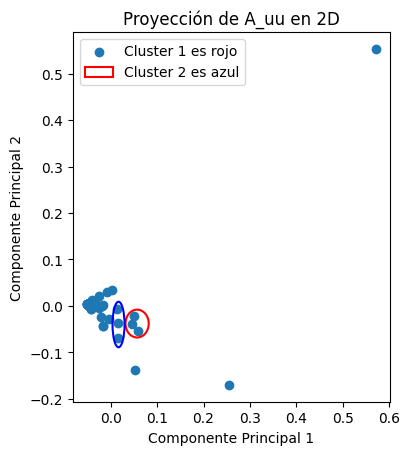

In [225]:
from matplotlib.patches import Ellipse

plt.scatter(coords_x_A_uu_centrada, coords_y_A_uu_centrada)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Proyección de A_uu en 2D')
#Cluster 1
x1 = 0.057
y1 = -0.038
ancho1 = 0.05
alto1 = 0.06

elipse1 = Ellipse((x1, y1), ancho1, alto1, edgecolor='red', facecolor='none', lw=1.5)
plt.gca().add_patch(elipse1)

#Cluster 2
x2 = 0.017
y2 = -0.04
ancho2 = 0.0259
alto2 = 0.098

elipse2 = Ellipse((x2, y2), ancho2, alto2, edgecolor='blue', facecolor='none', lw=1.5)
plt.gca().add_patch(elipse2)
plt.legend([
    'Cluster 1 es rojo',
    'Cluster 2 es azul'
], loc='upper left')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


In [226]:
#Buscamos los sectores correspondientes a cada cluster

# Creamos una lista con los sectores y sus coordenadas
def BuscarSectores(p1, p2):
    registro = []
    for i in range (40):
        x:float = p1[i]
        y:float = p2[i]
        registro.append((i + 1,x ,y))
    return registro

coordenadas = BuscarSectores(coords_x_A_uu_centrada, coords_y_A_uu_centrada)

# Ordenamos por coordenada x de menor a mayor
coordenadas_ordenadas = sorted(coordenadas, key=lambda x: x[1])

print(coordenadas_ordenadas)

[(3, array([-0.05021995]), array([0.00391158])), (31, array([-0.05021995]), array([0.00391158])), (32, array([-0.05015872]), array([0.00385604])), (29, array([-0.05000205]), array([0.00361066])), (28, array([-0.04989375]), array([0.00346109])), (30, array([-0.04889864]), array([0.00271322])), (10, array([-0.04870253]), array([0.00398615])), (19, array([-0.04843647]), array([0.00273981])), (26, array([-0.04833829]), array([0.00131298])), (11, array([-0.04717668]), array([0.0012802])), (7, array([-0.04673107]), array([0.00602926])), (9, array([-0.0464286]), array([0.00409791])), (33, array([-0.04633081]), array([-0.00030622])), (25, array([-0.04306981]), array([-0.00596288])), (23, array([-0.04225522]), array([-0.00708785])), (12, array([-0.04188002]), array([0.00045639])), (21, array([-0.04153058]), array([-0.00478845])), (2, array([-0.04113889]), array([0.0125933])), (13, array([-0.04048598]), array([-0.00134335])), (18, array([-0.03019805]), array([0.00170807])), (15, array([-0.025984

El cluster numero uno muestra a los sectores 36 (Transporte), 39 (Servicios a empresas de todo tipo), y 38 (Finanzas y seguros). Tiene sentido que esten estos 3 sectores relacionados para con la economia de una forma similar ya que los 3 sectores rpresentan servicios prestados a un amplia variedad de empresas y/o individuos, no son bienes ni productos. Al mismo tiempo son 3 sectores escenciales para el funcionamiento de cualquier economia hecha y derecha.

El cluster numero dos muestra a los sectores 35 (Construccion), 4 (Mineria) y 34 (Electricidad y gas). Nuevamente vemos una relacion clara entre los mismos, y de éstos con el resto de sectores productivos del Uruguay. Los tres sectores son de mano de obra pesada, proveedores de servicios irremplazables y grandes motores de la economia. La interdependencia entre ellos es clara, también se puede notar que el rol que cumplen en la economia uruguaya es equivalente, el impacto en la proyección refleja esto.

###**Consigna 9**
**En este caso utilizaremos la matriz $H$ que representa la matriz input-output
integrada verticalmente. Esta matriz se define mediante la ecuación**

\begin{align*} H = A(I −A)^{−1} \end{align*}



**Se dice que esta matriz tiene la particularidad de reforzar las relaciones entre los sectores que de ya por si tienen una alta relevancia en A. Encontrar cual es la relación de H con la suma de potencias.**



Notamos que por la consigna 1, la matriz $H$ puede ser expresada de la siguiente forma:

$ H = A(I −A)^{−1} = A (I + A + A^{2} + . . . + A^{n})= (A + A^{2} + A^{3} + . . . + A^{n+1})  $

$H$ entonces es la serie de potencias pero con un grado mas, es decir comienza en A con exponente igual a 1, $~(A^1)$.

###**Consigna 10**
**Repetir el análisis en Componentes Principales para las matrices $H$, separando en clusters y analizando los sectores agrupados.**

Calculando $H$ y su respectiva matriz de covarianza, proyectamos las filas de la misma y se pueden observar los siguientes clusters con un radio 0.001 :

In [227]:
H = funciones_TP2.calcularH(A_uu)

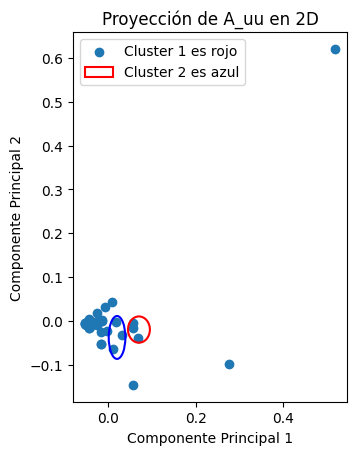

In [228]:
covarianza_H = funciones_TP2.matriz_covarianza(H)
autovalores_H, autovectores_H = funciones_TP2.hotelling(covarianza_H)
coords_x_H_centrada, coords_y_H_centrada = funciones_TP2.proyectar(autovectores_H[0], autovectores_H[1], A_uu)

plt.scatter(coords_x_H_centrada, coords_y_H_centrada)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Proyección de A_uu en 2D')
#Cluster 1
x1 = 0.07
y1 = -0.020
ancho1 = 0.05
alto1 = 0.06

elipse1 = Ellipse((x1, y1), ancho1, alto1, edgecolor='red', facecolor='none', lw=1.5)
plt.gca().add_patch(elipse1)

#Cluster 2
x2 = 0.020
y2 = -0.038
ancho2 = 0.038
alto2 = 0.098

elipse2 = Ellipse((x2, y2), ancho2, alto2, edgecolor='blue', facecolor='none', lw=1.5)
plt.gca().add_patch(elipse2)
plt.legend([
    'Cluster 1 es rojo',
    'Cluster 2 es azul'
], loc='upper left')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [229]:
print(buscarSectores(coords_x_H_centrada, coords_y_H_centrada))

[(1, 0.8078388502026095), (2, 0.04410677995174622), (3, 0.05267917896943093), (4, 0.06489904357262169), (5, 0.0435359516097272), (6, 0.030636822928727405), (7, 0.048676663638055485), (8, 0.03161564071139195), (9, 0.04862087858745831), (10, 0.05105393524672627), (11, 0.04943764555892397), (12, 0.044137258660186134), (13, 0.03598300126497651), (14, 0.021193336438255495), (15, 0.02720464237704612), (16, 0.023866876172184078), (17, 0.015226205945685958), (18, 0.028666700735223014), (19, 0.05070388007187379), (20, 0.01388922842115947), (21, 0.04393265613561093), (22, 0.05533587166405372), (23, 0.04706992467128203), (24, 0.15697307747775874), (25, 0.047492437022401135), (26, 0.05107807631443718), (27, 0.05530403370131785), (28, 0.052390763421049126), (29, 0.05248603010825173), (30, 0.051408831955795556), (31, 0.05267917896943093), (32, 0.05261995855851659), (33, 0.0487381309757467), (34, 0.017561432727445862), (35, 0.045123227584601244), (36, 0.056824573208496335), (37, 0.030885116629643328)

El analisis previamente hecho para el punto 8 es el mismo que hariamos aca, las relaciones entre sectores productivos en la economia uruguaya se reflejan de igual manera en $A^{uu}$ y en $H$. No hay distintivos considerables, la única observacion importante a hacer es que en el grafico de $H$ los sectores de los clusters estan aun mas pegados. Veremos en la consigna 11 si el patron se repite y como se nota la diferencia a nivel grafico.

###**Consigna 11**


**Vamos a analizar el perfil de producción para sectores bien diferenciados.**

**Para ello,
En el espacio de ACP en 2 dimensiones, calcular las distancias al origen de coordenadas de cada punto.**

*   **Identificar el sector más lejano y el más cercano al origen.**
*   **Graficar la producción (fila) en $A^{rr}$ y $H$ de estos dos sectores.**
*   **Las curvas obtenidas para el caso más cercano y el más lejano al origen (de cada caso) se deberían mostrar diferentes.**
* **¿Cuál sería la base de esa diferencia y lo que los hace estar tanto lejos como cerca del origen?**



In [230]:
df_covarianza_H= pd.DataFrame(covarianza_H)
df_H= pd.DataFrame(H)

# Llamamos a la función para encontrar el máximo y mínimo de las coordenadas de A_uu
maximo_A_uu, minimo_A_uu = funciones_TP2.maximoMinimoPunto(coords_x_A_uu_centrada, coords_y_A_uu_centrada)

# Llamamos a la función para encontrar el máximo y mínimo de las coordenadas de H
maximo_H, minimo_H = funciones_TP2.maximoMinimoPunto(coords_x_H_centrada, coords_y_H_centrada)

# Encontramos los sectores correspondientes a los puntos máximo y mínimo de A_uu
sector_max_A_uu, sector_min_A_uu = funciones_TP2.sectorCorrespondiente(maximo_A_uu, minimo_A_uu, coords_x_A_uu_centrada, coords_y_A_uu_centrada)

# Encontramos los sectores correspondientes a los puntos máximo y mínimo de H
sector_max_H, sector_min_H = funciones_TP2.sectorCorrespondiente(maximo_H, minimo_H, coords_x_H_centrada, coords_y_H_centrada)

print("maximo sector A_uu =", sector_max_A_uu)
print("minimo sector A_uu =", sector_min_A_uu )
print("maximo sector H =", sector_max_H)
print("minimo sector H =", sector_min_H)

maximo sector A_uu = 1
minimo sector A_uu = 20
maximo sector H = 1
minimo sector H = 20


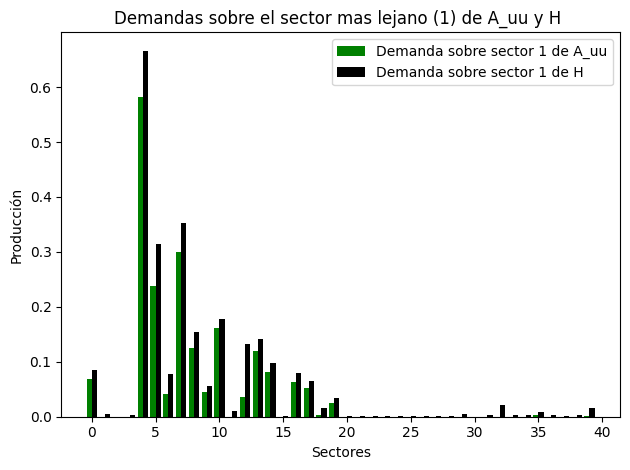

In [231]:

sectores = []
produccion_A_uu_max = []
produccion_H_max = []

# Armamos la lista de demanda sobre el maximo sector
for i in range(1, 41):
    sectores.append(i)  # Índices de sectores
    produccion_A_uu_max.append(A_uu.iloc[sector_max_A_uu - 1, i - 1])
    produccion_H_max.append(df_H.iloc[sector_max_H - 1, i - 1])

# Definimos el ancho de las barras
ancho_barra = 0.4
x = range(len(sectores))  # Índices para las barras

# Graficamos las barras ajustando sus posiciones
plt.bar([pos - ancho_barra/2 for pos in x], produccion_A_uu_max, width=ancho_barra, label='Demanda sobre sector 1 de A_uu', color='green')
plt.bar([pos + ancho_barra/2 for pos in x], produccion_H_max, width=ancho_barra, label='Demanda sobre sector 1 de H', color='black')

# Etiquetas y título
plt.xlabel('Sectores')
plt.ylabel('Producción')
plt.title('Demandas sobre el sector mas lejano (1) de A_uu y H ')
plt.legend()

# Mostrar gráfico
plt.tight_layout()
plt.show()


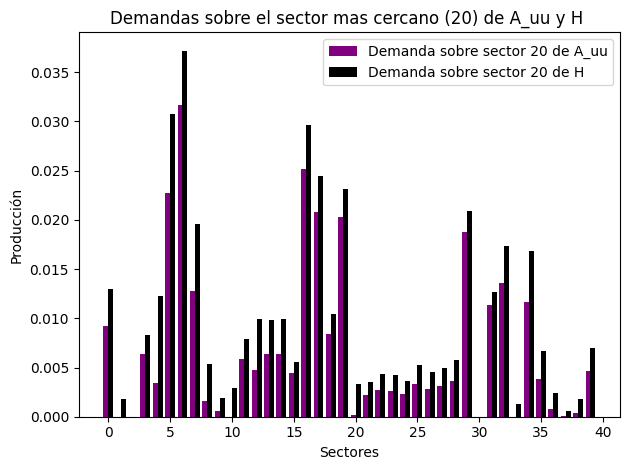

In [232]:
sectores = []
produccion_A_uu_min = []
produccion_H_min = []

# Armamos la lista de demanda sobre el maximo sector
for i in range(1, 41):
    sectores.append(i)  # Índices de sectores
    produccion_A_uu_min.append(A_uu.iloc[sector_min_A_uu - 1, i - 1])
    produccion_H_min.append(df_H.iloc[sector_min_H - 1, i - 1])

# Definimos el ancho de las barras
ancho_barra = 0.4
x = range(len(sectores))  # Índices para las barras

# Graficamos las barras ajustando sus posiciones
plt.bar([pos - ancho_barra/2 for pos in x], produccion_A_uu_min, width=ancho_barra, label='Demanda sobre sector 20 de A_uu', color='purple')
plt.bar([pos + ancho_barra/2 for pos in x], produccion_H_min, width=ancho_barra, label='Demanda sobre sector 20 de H', color='black')

# Etiquetas y título
plt.xlabel('Sectores')
plt.ylabel('Producción')
plt.title('Demandas sobre el sector mas cercano (20) de A_uu y H ')
plt.legend()

# Mostrar gráfico
plt.tight_layout()
plt.show()


Dados los 2 graficos mostrados podemos notar una correlación:

Todos los sectores que demandan en cierta proporcion sobre el sector analizado en $A^{uu}$ también lo hacen en $H$, pero en una mayor proporción.
Esto tiene sentido si vemos como está formado $H$, es el cociente entre $A^{uu}$
y $(I-A)$,  es decir,  $H$ es una matriz con coeficientes menores o iguales (en módulo) que $A$.

 Esto nos lleva a pensar que todos los coeficientes de $H$ representan las mismas relaciones que $A$ pero con mas "énfasis".

La interpretación que conseguimos darle a porque un sector está mas cerca o lejos del $0$ es la siguiente:

Si un sector esta mas cercano al origen representa una baja influencia relativa en el sistema, lo que se traduce en demandas más moderadas, tanto en $A^{uu}$ como en $H$. Y si un sector está mas alejado del origen, esto se debe a que tiene una influencia significativa en el sistema, reflejada en demandas altas. En $H$ este efecto  es mas pronunciado ya que las interdependencias se ven reforzadas.

En resumen, las diferencias entre las curvas obtenidas para el sector mas lejano y el mas cercano muestran perfiles claramente distintos. Esto sugiere que las interacciones economicas (capturadas en $H$) tienen un impacto diferencial segun la posicion del sector en el sistema productivo.